# Løsningsforslag til øvelse om Intro til 2BoxModel

In [1]:
# Lese inn relavente python pakker vi ska bruke
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib notebook inkluder denne linjen om du vil åpne i Jupyter Notebook og vil lage interaktive plott

from toboks import calculate_temp_anomalies # henter funksjonen som beregner temperaturanomalier basert på toboksmodellen


### 1. Bestem strålingspådrivene

In [2]:
# les inn historisk data fra filen 'historical.csv'
df=pd.read_csv('historical_IPCC6.csv',index_col = 0,sep=',',encoding = "utf-8")

In [3]:
# --------------------
# Forcing switches [n=1 off=0]
# --------------------
switch_ghg=1     # Greenhouse gas forcing on=1 off=0
switch_solar=1   # Solar forcing on=1 off=0
switch_volc=1    # Volcanic forcing on=1 off=0
switch_land=1    # Landuse forcing on=1 off=0
switch_aero=1    # Pollution particle forcing on=1 off=0

# Beregn og plot det totale strålingspådriv
total_forcing = switch_ghg*df['drivhusgasser']+switch_solar*df['solinnstråling']+switch_volc*df['vulkanisme']+switch_land*df['arealbruk']+switch_aero*df['aerosoler']


### Tilbakekoblingsfaktorer (climate feedbacks)

In [4]:
# CMIP5 values
lambda_planck=-3.1     # Stefan Boltzmann's 'feedback' [Wm-2K-1] best guesses  [-3.3 to -3.1]
lambda_lapse=-0.6      # Lapse rate feedback [Wm-2K-1] best guesses [-1.2 to -0.5]
lambda_water=1.7       # water vapor feedback [Wm-2K-1] best guesses [1.5 to 2.2]
lambda_cloud=0.50      # Clouds feedback [Wm-2K-1] best guesses [0.1 to 1.2]
lambda_albedo=0.40     # Surface albedo feedback [Wm-2K-1] best guesses [0.1 to 0.4]
lambda_other=0.0       # Other feedbacks [Wm-2K-1]

lambda_sum=sum([lambda_planck,
    lambda_lapse,
    lambda_water,
    lambda_cloud,
    lambda_albedo,
    lambda_other])

# Beregn og plot det totale strålingspådriv
total_forcing = switch_ghg*df['drivhusgasser']+switch_solar*df['solinnstråling']+switch_volc*df['vulkanisme']+switch_land*df['arealbruk']+switch_aero*df['aerosoler']

In [5]:
# Deep ocean heat uptake efficency [Wm-2K-1]
# CMIP3 values
gamma=-0.69  # best guesses [-1 to -0.5]

In [6]:
radiative_forcing = total_forcing.to_numpy() # konverter dataframe til data-array

## Temperaturendringer for perioden 1750-2011
Vi ønsker nå å beregne hvordan temperaturen endrer seg som resultat av hvilke strålingspådriv vi har slått på, verdiene vi har satt for tilbakekoblingsmekanismer, og varmeutveksling til havet. 

In [7]:
Ts, To = calculate_temp_anomalies(radiative_forcing, lambda_sum, gamma) # kaller opp funksjonen som regner ut temperaturendringene

In [8]:
temp = pd.DataFrame(index=df.index) # vi lager en ny dataramme som har samme indexer som pådrivet
temp['Temp.endring overflate']=Ts
temp['Temp.endring dyphavet']=To

## Øvelser

Nu har dere fået et innblikk i hvordan modellen fungerer. Bruk hva dere har lært til at undersøke følgene:
    
1. Beregn og plot endringen i overflatetemperatur (*Ts*) relativt til perioden 1850-1900 (*pre-industrial period*)
    - TIPS: se notebook fra modul0
    
2. Hvor mye har overflatetemperaturen (*Ts*) i år 2011 endret sig i forhold til perioden 1850-1900? 

3. Hva er den primære årsakken til denne endringen? Finn en måte å illustrere dette på.

4. Forklar med dine egen ord hva hvert enkel led i ligning (1) betyr. Undersøk deretter med modellen ved å slå av/på henholdsvis tilbakekoblingsmek. ($\lambda$) og varmeutveklsingen ($\gamma$)

    - Hvordan påvirkes overflatetemperaturen av disse endringene?

### BONUS: Finn selv på noe å undersøke med modellen
Presenter efterfølgende for resten af gruppen

### Løsningsforslag

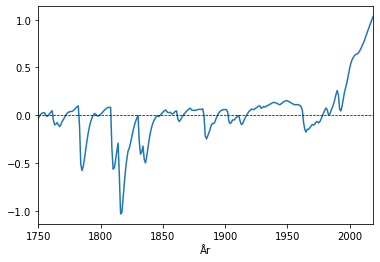

In [9]:
#### 1
dT1850_1900 = temp['Temp.endring overflate'].loc[1850:1900] #pre-industrial

Tanom =  temp['Temp.endring overflate']- dT1850_1900.mean() # temp. anomaly

# make plot
Tanom.plot()
plt.axhline(y=0, linewidth=0.7, color="black", ls='--')


In [10]:
#### 2

# bruk `loc` funktionen til å finne bestemt år

year = 2011
Tloc = Tanom.loc[year]
print('Temperature change at year ', year, ':', Tloc)


Temperature change at year  2011 : 0.7544852268920872


3) 
For å finne årsakken til denne endringen må vi se på effekten av de ulike strålingspådrivene. Dette ka gjøres manuelt ved å slå av/på switches for strålingspådrivene og deretter "kjøre" modellen. Vi ka også brukke en løkke for at gjøre det raskere (men og mer avansert). 

Vi ser at frem til år 1900 var det primært vulkanisme som styrte temperaturen og har en afkjøllene effekt. Men fra ca. 1900 og frem tar drivhusgassene over og giver en gradvis oppvarming. 

Beregner temp. endring for strålingspådriv: drivhusgasser
Beregner temp. endring for strålingspådriv: solinnstråling
Beregner temp. endring for strålingspådriv: vulkanisme
Beregner temp. endring for strålingspådriv: arealbruk
Beregner temp. endring for strålingspådriv: aerosoler


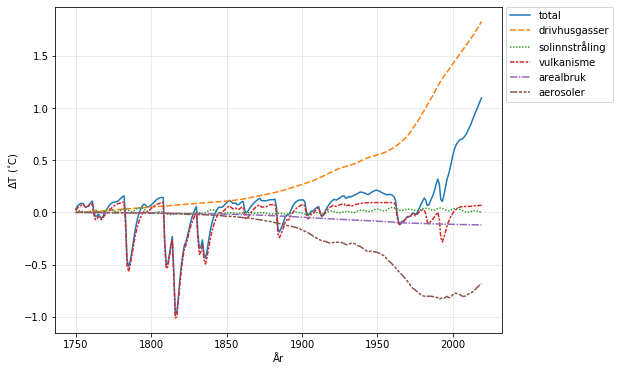

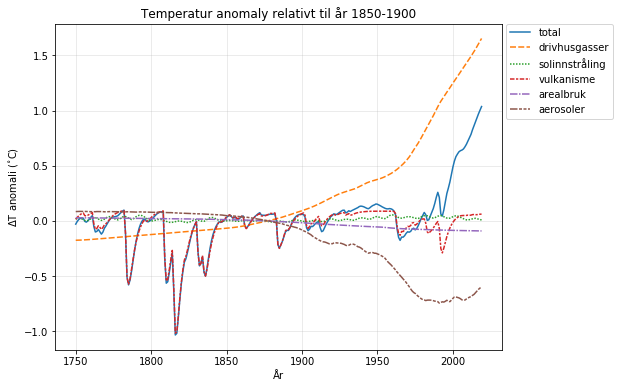

In [11]:
Ts = pd.DataFrame(index=df.index, columns=df.columns) # vi lager en ny dataramme som har samme struktur som pådrivet
To = pd.DataFrame(index=df.index, columns=df.columns) # vi lager en ny dataramme som har samme struktur som pådrivet

dims = df.columns.size # 

for index, Q in df.iteritems(): # loop over radiative forcings
    
    print("Beregner temp. endring for strålingspådriv:", Q.name)
    
    radiative_forcing = Q.to_numpy()
    Ts[Q.name], To[Q.name] = calculate_temp_anomalies(radiative_forcing, 
                                                      lambda_sum, 
                                                      gamma) # kaller opp funksjonen som regner ut temperaturendringene 
# beregn det totale endring
Ts['total'] = Ts.sum(axis='columns')

# reorder dataframe
cols = Ts.columns.tolist()
cols = cols[-1:] + cols[:-1]
Ts = Ts[cols]  

# beregn anomali 
dT1850_1900 = Ts.loc[1850:1900] #pre-industrial
Tanom =  Ts - dT1850_1900.mean() # temp. anomaly

# make plot
import seaborn as sns # make fancier plots

plt.figure(figsize=(8,6))
sns.lineplot(data = Ts)
plt.ylabel("$\Delta$T ($^{\circ}$C)")
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0) # place the legend outside the figure/plot

# og plot anomalier
plt.figure(figsize=(8,6))
sns.lineplot(data = Tanom)
plt.ylabel("$\Delta$T anomali ($^{\circ}$C)")
plt.title("Temperatur anomaly relativt til år 1850-1900")
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0) # place the legend outside the figure/plot

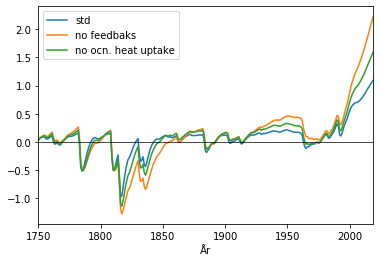

In [12]:
### 4

radiative_forcing = total_forcing.to_numpy() # konverter dataframe til data-array

Ts, To = calculate_temp_anomalies(radiative_forcing, lambda_sum, gamma) # alle led er med
Ts_lambda0, To_lambda0 = calculate_temp_anomalies(radiative_forcing, 0, gamma) # ingen tilbakekoblingsmek.
Ts_gamma0, To_gamma0 = calculate_temp_anomalies(radiative_forcing, lambda_sum, 0) # ingen varmeoptak i havet

# konverter til dataramme
dT = pd.DataFrame(index=df.index) # vi lager en ny dataramme som har samme indexer (i.e. årstal) som pådrivet
dT['std']=Ts
dT['no feedbaks']=Ts_lambda0
dT['no ocn. heat uptake']=Ts_gamma0

# plot 
dT.plot()
plt.axhline(y=0, linewidth=0.7, color="black")

Uten tilbakekoblingsmek. blir temperaturendringene forstærket. Som eksempel blir avkjøling som følge av vulkanutbrud mye stærkere ($\sim 1^{\circ}$C rundt år 1815, Mount Tambora). Tilsvarene blir opvarmingen fra år 1900 asselerert.  

Tilsvarene, når vi slår varmeoptaket i havet fra har det en avkjølene effekt gjennem pre-industrial perioden (1750-1900), men fra 1900 (og særligt fra 90-tallet) blir opvarmingen ganske forstærket. Med andre ord virker havet som en "buffer" som tar opp varmen fra atmosfæren og lagrer den i dybhavet. **Varmeoptaket i havet hjelper altså til at bremse den globale oppvarmingen.** 